# Part 2 of Drawing Ideograms: Karyotypes

This page is primarily based on the following page at the Circos documentation site:



- [2. Karyotypes](????????????)



That page is found as part number 4 of the ??? part ['Drawing Ideograms' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 1 by clicking [here &#8592;](Drawing_ideograms_Part1.ipynb).



----



2 --- Drawing Ideograms
=======================

2. Karyotypes
-------------

::: {#menu4}
[[Lesson](/documentation/tutorials/ideograms/karyotypes/lesson){.clean}]{.active}
[Images](/documentation/tutorials/ideograms/karyotypes/images){.normal}
[Configuration](/documentation/tutorials/ideograms/karyotypes/configuration){.normal}
:::

The karyotype file defines the axes. In biological context, these are
typically chromosomes, sequence contigs or clones.

Each axis (e.g. chromosome) is defined by unique identifier (referenced
in data files), label (text tag for the ideogram seen in the image),
size and color.

In addition to chromosomes, the karyotype file is used to define
position, identity and color of cytogenetic bands. For some genomes
these band data are available.

### designing the Circos image

The most difficult part of creating a Circos image---any visualization
for that matter---is deciding what data to show. Chances are your data
is too complex to show (e.g. its native format doesn\'t have a trivial
visual encoding, such as a scatter plot).

Mapping data onto a Circos figure requires that you identify what
patterns in your data are (a) likely to be important and (b) likely to
be present, and create a figure that exposes such patterns. Remember, if
the pattern exists, you can\'t afford to miss it. If it doesn\'t exist,
you can\'t afford to be fooled into thinking that it\'s there, or left
wondering whether it\'s occluded by other data.

If you don\'t know where to start when creating Circos images from
genomic and non-genomic data, look through [published examples from the
literature](/images/scientific_literature/). Find images whose patterns
map onto your data types.

Don\'t think necessarily from the point of view of how to construct
input files. First, identify what you want to show and how. Make a
sketch of the kind of figure you want to make. This is the hard part.

### defining chromosomes

Chromosome definitions are formatted as follows

```ini
chr - ID LABEL START END COLOR
```


The first two fields are always \"chr\", indicating that the line
defines a chromosome, and \"-\". The second field defines the parent
structure and is used only for band definitions.

The `id` is the identifier used in data files whereas the LABEL is the
text that will appear next to the ideogram on the image. If you are
working with multiple species, I suggest prefixing the chromosome number
with a species identifier (e.g., hs = *Homo sapiens*, mm = *Mus
musculus*, etc). Even when working with only one species, prefixing the
chromosome with a species code is highly recommended --- this will
greatly help in creating more transparent configuration and data files.

The `start` and `end` values define the size of the chromosome. The
karyotype file should store the entire chromsome size, not just the
region you wish to draw. Other configuration file parameters control the
drawable regions.

The `color` of the ideogram will be used, if you decide not to show the
cytogenetic bands and select the fill option. The color can be useful to
distinguish between species and chromosomes. Consider using the
conventional chromosome color scheme as defined in the
`etc/color.conf`{.syn-include} configuration file. Colors are defined
for each human chromosome and are named similiarly: `chr1`, `chr2`, \...
`chrx`, `chry`, `chrun`. Colors must be in lowercase.

The karyotype file is specified in the configuration file using

```ini
karyotype = data/karyotype/karyotype.human.txt
```


For example, the human karyotype for assembly
[GRCh37](http://www.ncbi.nlm.nih.gov/assembly/2758/) (hg19, Feb 2009) is
composed of 24 chromosomes

```ini
chr - hs1 1 0 249250621 chr1
chr - hs2 2 0 243199373 chr2
chr - hs3 3 0 198022430 chr3
...
chr - hs22 22 0 51304566 chr22
chr - hsX x 0 155270560 chrx
chr - hsY y 0 59373566 chry
```


together with 862 bands

```ini
band hs1 p36.33 p36.33 0 2300000 gneg
band hs1 p36.32 p36.32 2300000 5400000 gpos25
band hs1 p36.31 p36.31 5400000 7200000 gneg
...
band hsY q11.223 q11.223 22100000 26200000 gpos50
band hsY q11.23 q11.23 26200000 28800000 gneg
band hsY q12 q12 28800000 59373566 gvar
```


### cytogenetic bands

Bands are defined in the same manner as chromosomes, but the first two
fields are now `band` and the `id` of the parent chromosome.

```ini
band hs1 p36.33 p36.33 0 2300000 gneg
band hs1 p36.32 p36.32 2300000 5300000 gpos25
band hs1 p36.31 p36.31 5300000 7100000 gneg
...
band hs2 p25.3 p25.3 0 4300000 gneg
band hs2 p25.2 p25.2 4300000 7000000 gpos50
band hs2 p25.1 p25.1 7000000 12800000 gneg
...
```


You can obtain the karyotype structure from [UCSC Genome Viewer Table
Browser](http://genome.ucsc.edu/cgi-bin/hgTables?command=start) (Mapping
and Sequencing Tracks \> Chromosome Band) . Not all genomes have these
data, however. For example, mouse (mm9) and rat (rn4) have band
information, but not dog (canfam2) or cow (bostau3)

#### band transparency

Cytogenetic band structure is drawn on top of the ideograms. The
ideogram itself can have an associated color---this is defined in the
karotype file---and when band transparency is turned on, this color
shows through.

```ini
<ideogram>
show_bands = yes
fill_bands = yes
band_transparency = 4
...
</ideogram>
```


The value for band\_transparency can be `1..auto_alpha_steps`, where
`auto_alpha_steps` is the number of automatically generated transparency
steps for each color (see `etc/image.conf`{.syn-include}).

When `band_transparency=1`, the bands are *least* transparent.
Conversely, when `band_transparency=auto_alpha_steps`, the bands are
most transparent. For a given `band_transparency` value, the opacity is
given by `band_transparency/(auto_alpha_steps+1)` (e.g. 2/6 when
`band_transparency=2` and `auto_alpha_steps=5`).

#### when to use bands

The cytogenetic bands feature is meant \... for cytogenetic bands. These
ideogram annotations have two specific properties: they cover the entire
ideogram and they don\'t overlap.

If you want to use the band feature to show other ideogram annotations,
the data must meet these two conditions. It\'s likely that unless your
data *are* cytogenetic banding patterns, they won\'t (e.g. gene regions,
repeat regions, etc). In these case, use the [highlight plot
block](/documentation/tutorials/highlights/on_data/) and draw the
highlights within the ideograms by setting

```ini
r0 = dims(ideogram,radius_inner)
r1 = dims(ideogram,radius_outer)
```


### defining multiple species

If you would like to draw ideograms from multiple species, list their
karyotype files in the `karyotype` parameter

```ini
karyotype = data/karyotype/karyotype.human.txt,data/karyotype/karyotype.rat.txt
```


```ini
# data/karyotype/karyotype.human.txt
chr - hs1 1 0 249250621 chr1
chr - hs2 2 0 243199373 chr2
chr - hs3 3 0 198022430 chr3
...
```


```ini
# data/karyotype/karyotype.rat.txt
chr - rn1 1 0 267910886 chr1
chr - rn2 2 0 258207540 chr2
chr - rn3 3 0 171063335 chr3
...
```


### non-genomic karyotype files

Circos was designed to draw genomic data, but this isn\'t a limitation.
If you have any positional data that would benefit from a circular
composition, you can define abstract \"chromosomes\" to act as data
domains.

For example, consider this \"Naming Names\" [NYT graphic of a
presidential
debate](http://www.nytimes.com/interactive/2007/12/15/us/politics/DEBATE.html).
This image could be generated with Circos. In this case, the karyotype
would define each candidate as a \"chromosome\", and a segment of speech
as a \"band\". The NYT illustration is a wonderful analogy to
comparative genomics - each candidate (a genome) makes verbal reference
to (shows synteny) to another candidate (another genome).

If you have two integer ranges 0-1000 over which you wanted to display
data, you might define

```ini
chr - axis1 1 0 1000 green
chr - axis2 2 0 1000 red
```


Furthermore, you could use the band functionality to display a checkered
grid within each domain to indicate length.

```ini
band axis1 band1 band1 0 99 grey
band axis1 band2 band2 100 199 white
band axis1 band1 band1 200 299 grey
band axis1 band2 band2 300 399 white
...
```


The definitions in the karyotype file need not correspond to physical
structures. Among other things, you can use them to define contigs, such
as sequence or map contigs.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/2/2/

/home/jovyan/circos-tutorials-0.67/tutorials/2/2


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.35s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.36s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/2/2
debuggroup summary 0.36s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.36s loading configuration from file circos.conf
debuggroup summary 0.36s found conf file circos.conf
debuggroup summary 0.50s debug will appear for these features: output,summary
debuggroup summary 0.50s bitmap output image ./circos.png
debuggroup summary 0.50s SVG output image ./circos.svg
debuggroup summary 0.52s parsing karyotype and organizing ideograms
debuggroup summary 0.64s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.64s applying global and local scaling
debuggroup summary 0.65s allocating image, colors and brushes
debuggroup summary 2.56s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.56s drawing highlights and ideograms
debuggroup outp

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

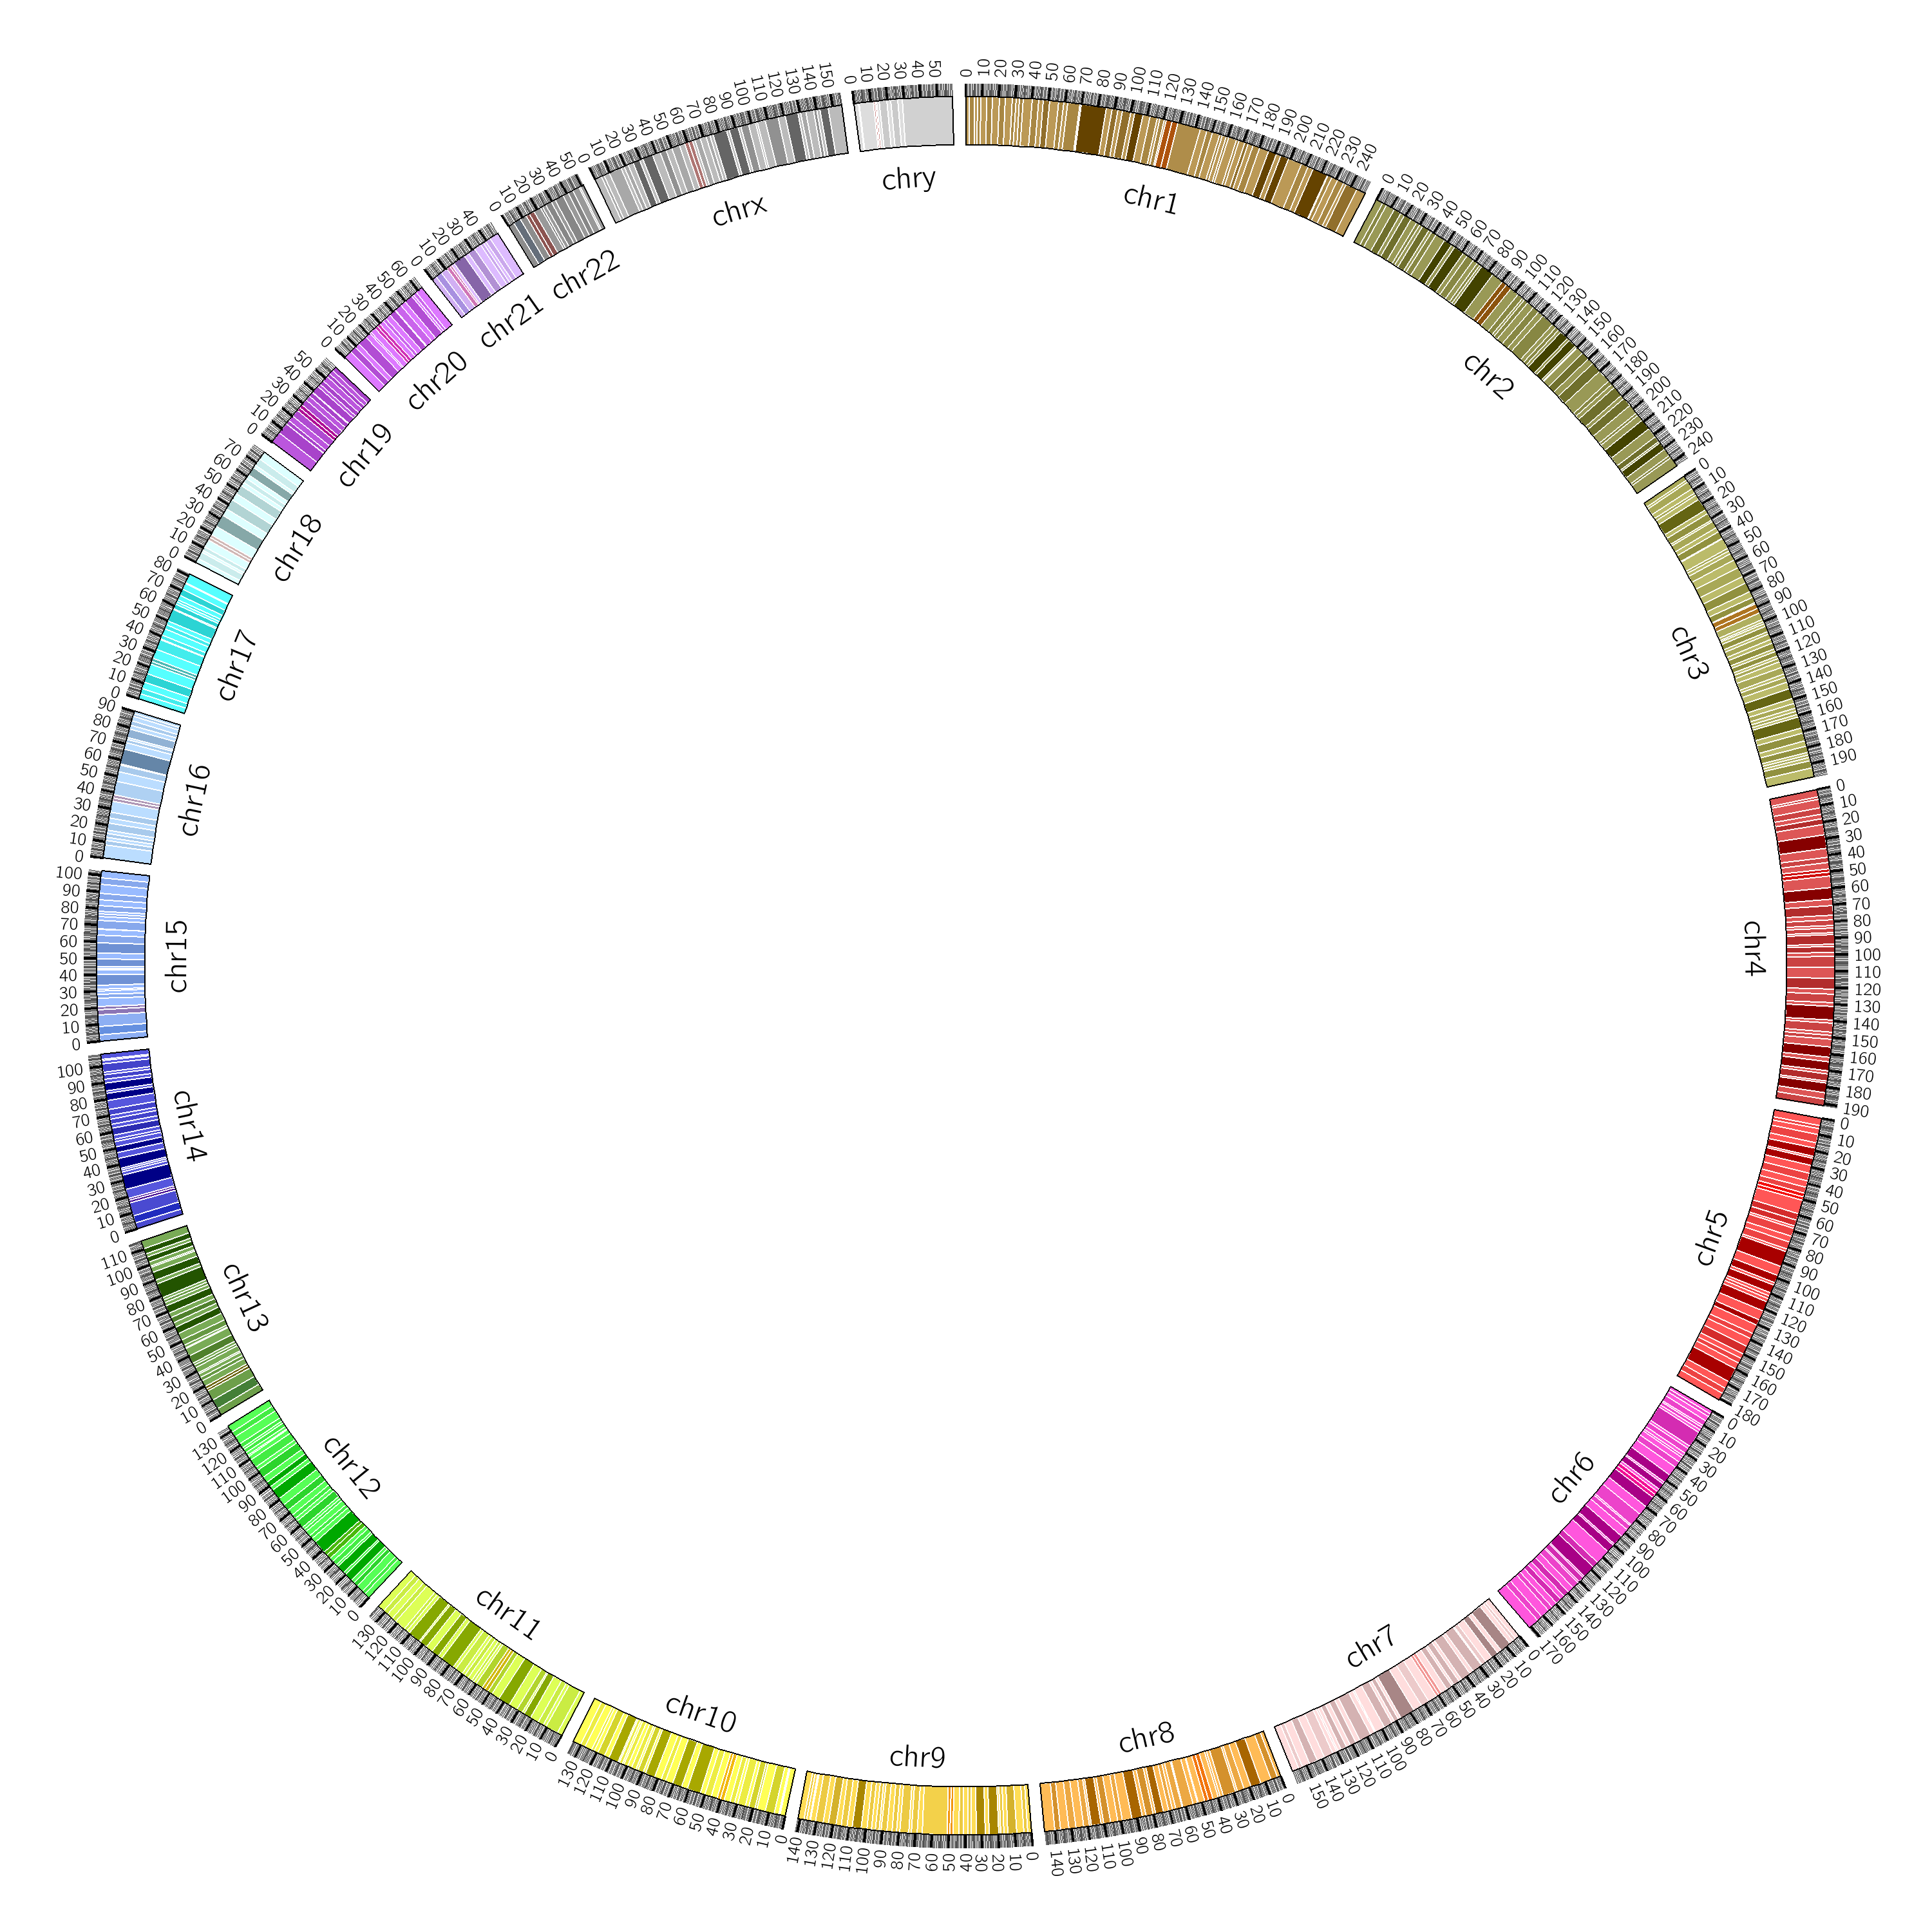

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Drawing Ideograms series by clicking [here &#10145;](Drawing_ideograms_Part3.ipynb).

----